In [1]:
import duckdb

sf_all = duckdb.query("select * from 'snowset/part.*.parquet' using sample 1 percent (bernoulli)").df()

sf_all

,index,queryId,warehouseId,databaseId,createdTime,endTime,durationTotal,durationExec,durationControlPlane,durationCompiling,...,profDmlRso,profHjRso,profBufRso,profFlatRso,profBloomRso,profAggRso,profBandRso,profPercentileRso,profUdtfRso,memoryUsed
0,96,3573560888585338320,7891774171123969424,7097937327349925659,2018-03-02 13:13:50.913,2018-03-02 13:14:31.815,40902,7986,733,76,...,22536,0,0,0,0,0,0,0,0,2144017808
1,216,8241806116388669556,7891774171123969424,7097937327349925659,2018-03-02 13:32:48.609,2018-03-02 13:33:26.715,38106,4881,828,77,...,11997,0,0,0,0,0,0,0,0,1400891664
2,268,1096864241800489343,7891774171123969424,7097937327349925659,2018-03-02 14:34:07.451,2018-03-02 14:34:44.425,36974,1677,222,1969,...,3007,0,0,0,0,0,0,0,0,789206816
3,376,7054370592006144647,7891774171123969424,7097937327349925659,2018-03-02 13:34:29.365,2018-03-02 13:35:36.926,67561,2324,680,1854,...,3998,0,0,0,0,0,0,0,0,777382398
4,416,5643653041788828328,7891774171123969424,7097937327349925659,2018-03-02 13:41:15.618,2018-03-02 13:41:44.962,29344,2420,682,88,...,2796,0,0,0,0,99,0,0,0,529882272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692143,34594109,5620861797097593870,518617277384270687,6399611409063837993,2018-03-05 17:31:32.798,2018-03-05 17:32:09.559,36761,17776,1017,2648,...,4601,69011,0,0,13856,33,0,0,0,2687622704
692144,34594163,1221273439061198724,518617277384270687,6399611409063837993,2018-03-05 17:33:25.252,2018-03-05 17:33:28.347,3095,1620,521,531,...,545,0,0,0,0,0,0,0,0,166701408
692145,34594179,5344795702022901932,9217905476676616273,6399611409063837993,2018-03-05 16:31:18.700,2018-03-05 16:31:24.990,5399,3017,5,2331,...,0,4926,0,0,0,419,0,0,0,747001024
692146,34594190,2097026435791425528,9217905476676616273,6399611409063837993,2018-03-05 16:30:22.250,2018-03-05 16:30:24.366,2341,1082,4,1222,...,0,99,0,0,24,99,0,0,0,509438896


In [2]:
query = """
select

persistentReadBytesS3 > 0 as persistentReadBytesS3,
persistentReadBytesCache > 0 as persistentReadBytesCache,
persistentWriteBytesCache > 0 as persistentWriteBytesCache,
persistentWriteBytesS3 > 0 as persistentWriteBytesS3,
intDataWriteBytesLocalSSD > 0 as intDataWriteBytesLocalSSD,
intDataReadBytesLocalSSD > 0 as intDataReadBytesLocalSSD,
intDataWriteBytesS3 > 0 as intDataWriteBytesS3,
intDataReadBytesS3 > 0 as intDataReadBytesS3,
ioRemoteExternalReadBytes > 0 as ioRemoteExternalReadBytes,
intDataNetReceivedBytes > 0 as intDataNetReceivedBytes,
intDataNetSentBytes > 0 as intDataNetSentBytes,

producedRows == 0 as producedRows0,
producedRows == 1 as producedRows1,

returnedRows == 0 as returnedRows0,
returnedRows == 1 as returnedRows1,

remoteSeqScanFileOps > 0 as remoteSeqScanFileOps,
localSeqScanFileOps > 0 as localSeqScanFileOps,
localWriteFileOps > 0 as localWriteFileOps,
remoteWriteFileOps > 0 as remoteWriteFileOps,
filesCreated > 0 as filesCreated,
profPersistentReadCache > 0 as profPersistentReadCache,
profPersistentWriteCache > 0 as profPersistentWriteCache,
profPersistentReadS3 > 0 as profPersistentReadS3,
profPersistentWriteS3 > 0 as profPersistentWriteS3,
profIntDataReadLocalSSD > 0 as profIntDataReadLocalSSD,
profIntDataWriteLocalSSD > 0 as profIntDataWriteLocalSSD,
profIntDataReadS3 > 0 as profIntDataReadS3,
profIntDataWriteS3 > 0 as profIntDataWriteS3,
profRemoteExtRead > 0 as profRemoteExtRead,
profRemoteExtWrite > 0 as profRemoteExtWrite,
profResWriteS3 > 0 as profResWriteS3,
profFsMeta > 0 as profFsMeta,
profDataExchangeNet > 0 as profDataExchangeNet,
profDataExchangeMsg > 0 as profDataExchangeMsg,
profControlPlaneMsg > 0 as profControlPlaneMsg,
profOs > 0 as profOs,
profMutex > 0 as profMutex,
profSetup > 0 as profSetup,
profSetupMesh > 0 as profSetupMesh,
profTeardown > 0 as profTeardown,
profScanRso > 0 as profScanRso,
profXtScanRso > 0 as profXtScanRso,
profProjRso > 0 as profProjRso,
profSortRso > 0 as profSortRso,
profFilterRso > 0 as profFilterRso,
profResRso > 0 as profResRso,
profDmlRso > 0 as profDmlRso,
profHjRso > 0 as profHjRso,
profBufRso > 0 as profBufRso,
profFlatRso > 0 as profFlatRso,
profBloomRso > 0 as profBloomRso,
profAggRso > 0 as profAggRso,
profBandRso > 0 as profBandRso,

from 'snowset/part.*.parquet'
"""
sf_features = duckdb.query(query).pl()
sf_corr = sf_features.corr()
sf_corr

persistentReadBytesS3,persistentReadBytesCache,persistentWriteBytesCache,persistentWriteBytesS3,intDataWriteBytesLocalSSD,intDataReadBytesLocalSSD,intDataWriteBytesS3,intDataReadBytesS3,ioRemoteExternalReadBytes,intDataNetReceivedBytes,intDataNetSentBytes,producedRows0,producedRows1,returnedRows0,returnedRows1,remoteSeqScanFileOps,localSeqScanFileOps,localWriteFileOps,remoteWriteFileOps,filesCreated,profPersistentReadCache,profPersistentWriteCache,profPersistentReadS3,profPersistentWriteS3,profIntDataReadLocalSSD,profIntDataWriteLocalSSD,profIntDataReadS3,profIntDataWriteS3,profRemoteExtRead,profRemoteExtWrite,profResWriteS3,profFsMeta,profDataExchangeNet,profDataExchangeMsg,profControlPlaneMsg,profOs,profMutex,profSetup,profSetupMesh,profTeardown,profScanRso,profXtScanRso,profProjRso,profSortRso,profFilterRso,profResRso,profDmlRso,profHjRso,profBufRso,profFlatRso,profBloomRso,profAggRso,profBandRso
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.026273,0.365169,-0.017117,0.002858,0.003445,0.039466,0.039419,-0.166483,0.474575,0.474576,-0.033491,-0.087929,0.045615,-0.045806,-0.165578,0.003144,0.380272,0.021056,-0.017257,0.142693,0.275176,0.85553,0.034608,0.046463,0.051136,0.033402,0.039452,-0.154662,0.045862,0.086164,0.326694,0.283018,0.121478,0.112681,0.085665,0.199773,0.159041,0.205108,0.069498,0.513029,-0.165154,0.214113,0.118524,0.167668,0.028796,-0.013135,0.09444,0.064074,0.050648,0.068966,0.166336,0.001938
0.026273,1.0,-0.142457,-0.22985,0.021171,0.023011,0.013938,0.013921,-0.447734,0.14095,0.14095,0.08769,0.048216,0.27432,-0.274389,-0.447212,0.02293,-0.137161,-0.215541,-0.229894,0.241101,0.090544,0.085702,-0.127981,0.03983,0.035156,0.010642,0.013924,-0.412613,0.0134,0.05648,0.142169,0.173176,0.185477,-0.044599,0.069926,0.259751,0.173253,0.108209,0.057839,0.331773,-0.424987,0.153115,0.144792,0.225325,-0.005369,-0.227234,0.230381,0.116228,0.027466,0.204869,0.189323,0.014423
0.365169,-0.142457,1.0,0.688848,0.075317,0.07507,0.019014,0.019021,0.224537,-0.047464,-0.047464,-0.406768,-0.310173,-0.534147,0.534474,0.224712,0.075071,0.968458,0.682521,0.688766,-0.08586,0.109668,0.314879,0.5484,0.051484,0.051689,0.016418,0.019006,0.243563,-0.024497,-0.073693,0.127534,0.023091,0.040546,0.248637,0.009481,-0.127855,-0.115825,-0.005529,-0.019317,-0.124306,0.229607,0.014851,0.096254,-0.254939,0.011612,0.667802,-0.218726,0.101415,0.00182,-0.183792,-0.120665,-0.01187
-0.017117,-0.22985,0.688848,1.0,0.092947,0.092697,0.025536,0.02563,0.359726,-0.264052,-0.264051,-0.520914,-0.333741,-0.784086,0.784927,0.359849,0.092612,0.671699,0.925031,0.99985,-0.228843,-0.03982,-0.04216,0.795872,0.049373,0.048359,0.021719,0.025544,0.369321,-0.117258,-0.250951,-0.01644,-0.097233,0.028437,0.338679,-0.040875,-0.242804,-0.193743,-0.118247,-0.06469,-0.303889,0.361919,-0.052095,0.129195,-0.469564,-0.028814,0.956821,-0.266324,0.128922,-0.032633,-0.229939,-0.303331,-0.011319
0.002858,0.021171,0.075317,0.092947,1.0,0.996383,0.203698,0.203523,0.167525,0.030428,0.030428,-0.051765,-0.0471,-0.081909,0.081899,0.171444,0.99569,0.09464,0.101712,0.092399,0.021432,0.104174,0.028545,0.128478,0.614861,0.633616,0.176421,0.203602,0.16729,0.04361,-0.005608,0.292794,0.190738,0.286155,0.16716,0.106266,0.160659,0.022169,0.026675,0.017468,0.067192,0.173733,0.199357,0.40034,-0.037568,0.000962,0.103243,-0.009439,0.581306,0.014768,-0.022401,0.008753,0.094309
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.064074,0.116228,0.101415,0.128922,0.581306,0.583554,0.136336,0.136443,0.225199,0.063181,0.063182,-0.07336,-0.068801,-0.119697,0.119762,0.227028,0.583193,0.113619,0.13706,0.12881,-0.005298,0.085343,0.104415,0.179283,0.346401,0.357957,0.11575,0.136291,0.229605,0.04283,-0.010375,0.323627,0.256281,0.377987,0.251208,0.079796,0.258794,0.098252,0.11865,0.043624,0.173

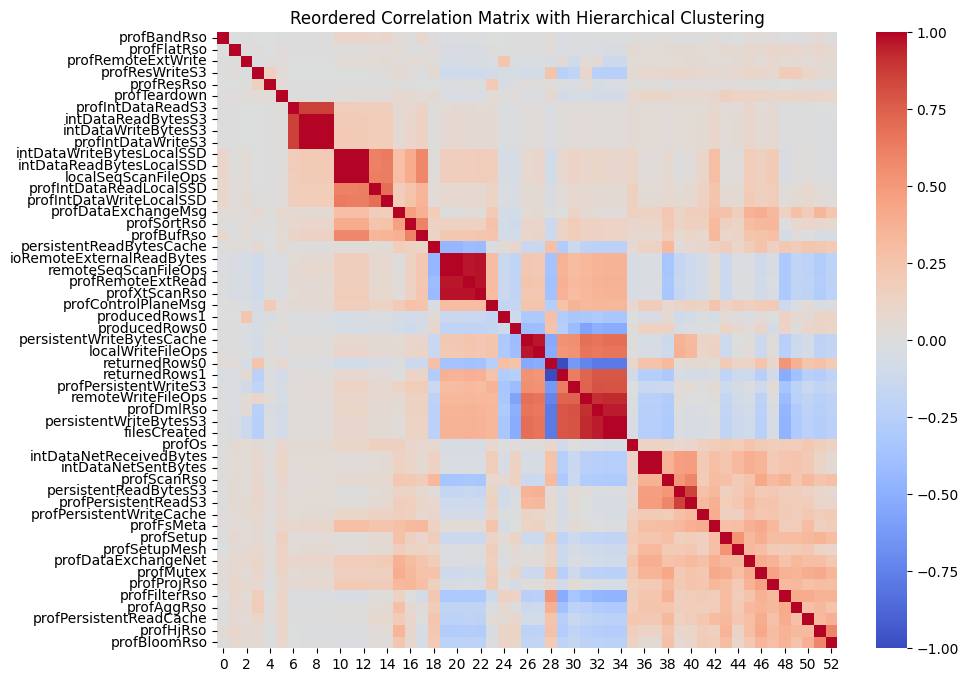

In [3]:
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = sf_corr.to_numpy()

# Clean up numerical error
for i in range(len(corr_matrix)):
    corr_matrix[i, i] = 1
corr_matrix = (corr_matrix + corr_matrix.T) / 2

# Create the distance matrix: 1 - |correlation|
dist_matrix = 1 - np.abs(corr_matrix)

# Perform hierarchical clustering on the symmetric distance matrix
linkage = sch.linkage(sch.distance.squareform(dist_matrix), method='average')

# Get the order of the features after clustering
ordered_indices = sch.dendrogram(linkage, no_plot=True)['leaves']

# Reorder the matrix using the ordered indices
corr_matrix = corr_matrix[np.ix_(ordered_indices, ordered_indices)]

# Step 4: Plot the reordered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, yticklabels=[sf_corr.columns[i] for i in ordered_indices])
plt.title('Reordered Correlation Matrix with Hierarchical Clustering')
plt.show()

In [4]:
import altair as alt 

sf_costs = duckdb.query(
"""
select 
    case
        when profRemoteExtRead > 0 then 'Ingest'
        when profRemoteExtWrite > 0 then 'Export'
        when persistentReadBytesS3 + persistentReadBytesCache == 0 and persistentWriteBytesS3 > 0 then 'Ingest'
        when persistentReadBytesS3 + persistentReadBytesCache > 0 and persistentWriteBytesS3 > 0 then 'Transformation'
        when persistentReadBytesS3 + persistentReadBytesCache > 0 and persistentWriteBytesS3 == 0 then 'Read'
        else 'Other' end as "Query Type",
    sum(durationExec * warehouseSize) as "Cost",
from 'snowset/part.*.parquet'
group by all
"""
).df()
sf_costs['Cost'] = sf_costs['Cost'] / sf_costs['Cost'].sum()

alt.Chart(sf_costs).mark_bar(color='blue').encode(
    x='Cost', 
    y=alt.Y('Query Type', sort=["Ingest", "Transformation", "Read", "Export", "Other"])
)

alt.Chart(...)

In [5]:
redshift_sample = duckdb.query("select * from 'redset/provisioned/parts/*.parquet' using sample 1 percent (bernoulli)").df()
redshift_sample

,instance_id,cluster_size,user_id,database_id,query_id,arrival_timestamp,compile_duration_ms,queue_duration_ms,execution_duration_ms,feature_fingerprint,...,num_permanent_tables_accessed,num_external_tables_accessed,num_system_tables_accessed,read_table_ids,write_table_ids,mbytes_scanned,mbytes_spilled,num_joins,num_scans,num_aggregations
0,0,NaN,2,0,4338982,2024-03-01 00:01:25.248305,80.0,0,82,c7eb643698bc57d7571700717413c12dc5f533291e1312...,...,1.0,0.0,0.0,12,12,123.0,0.0,0,1,2
1,0,NaN,2,0,3200032,2024-03-01 00:03:05.040435,1368.0,0,1580,58dba2ec912c82b5f28cea09b165b0b88e53c413351b6b...,...,1.0,1.0,0.0,None,12,26.0,0.0,0,0,2
2,0,NaN,2,0,2927869,2024-03-01 00:10:56.886588,834.0,0,839,None,...,1.0,0.0,0.0,150804,None,1944.0,0.0,0,1,2
3,0,NaN,2,0,3132067,2024-03-01 00:11:17.734212,896.0,0,944,None,...,1.0,0.0,0.0,171990,None,1961.0,0.0,0,1,2
4,0,NaN,10,0,3346993,2024-03-01 00:11:53.995976,0.0,0,464,6325e1482968eae895cc640d7c9f29d0d4a26132c80042...,...,0.0,1.0,0.0,None,None,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329210,99,4.0,0,0,1112430,2024-05-29 23:16:11.923376,9.0,0,320,ebb731afb39e004dfa53854adfc2c029d374051f2eb9c1...,...,1.0,0.0,0.0,"127684,5",None,1037.0,0.0,1,2,0
4329211,99,4.0,0,0,1792593,2024-05-29 23:30:11.747780,70.0,0,72,49a66d7b66a6a2b17f9b8a2d2a4a10e53b0efe6ba8e88f...,...,0.0,0.0,0.0,None,109431,0.0,0.0,0,0,2
4329212,99,4.0,0,0,1683808,2024-05-29 23:33:36.123356,NaN,0,2,None,...,1.0,0.0,0.0,None,None,NaN,NaN,0,0,0
4329213,99,4.0,0,0,1710408,2024-05-29 23:38:52.357817,12.0,0,21,43fca7b243173b30e3234dd3582cf6888a6dca8a464d3b...,...,1.0,0.0,0.0,"186850,2",None,219.0,0.0,1,2,0


In [6]:
rs_sum = duckdb.query(
"""
select 
    query_type, 
    sum(if(read_table_ids is not null, execution_duration_ms * cluster_size, 0)) as reads,
    sum(if(write_table_ids is not null, execution_duration_ms * cluster_size, 0)) as writes,
    sum(execution_duration_ms * cluster_size) as cost
from 'redset/provisioned/parts/*.parquet'
group by all
order by cost desc
"""
).df()
rs_sum['reads'] = rs_sum['reads'] / rs_sum['cost'].sum()
rs_sum['writes'] = rs_sum['writes'] / rs_sum['cost'].sum()
rs_sum['cost'] = rs_sum['cost'] / rs_sum['cost'].sum()
rs_sum

,query_type,reads,writes,cost
0,ctas,0.270622,0.278656,0.286966
1,select,0.147961,0.000000,0.180584
2,unload,0.153965,0.157082,0.169176
3,insert,0.150272,0.165365,0.167070
4,copy,0.000000,0.100758,0.100914
5,delete,0.029675,0.029658,0.029676
6,update,0.029285,0.029216,0.029288
7,analyze,0.015770,0.000000,0.019488
8,vacuum,0.000229,0.013629,0.014166
9,other,0.001236,0.001173,0.002673


In [16]:
redshift_costs = duckdb.query(
"""
select 
    case when query_type in ('insert', 'copy', 'delete', 'update') then 'Ingest'
         when query_type in ('ctas') then 'Transformation'
         when query_type in ('select') then 'Read'
         when query_type in ('unload') then 'Export'
         when query_type in ('analyze', 'vacuum', 'other') then 'Other'
         else error(query_type) end as "Query Type",
    sum(execution_duration_ms * cluster_size) as "Cost"
from 'redset/provisioned/parts/*.parquet'
where cluster_size is not null
group by all
"""
).df()
redshift_costs['Cost'] = redshift_costs['Cost'] / redshift_costs['Cost'].sum()

alt.Chart(redshift_costs).mark_bar(color='red').encode(
    x='Cost', 
    y=alt.Y('Query Type', sort=["Ingest", "Transformation", "Read", "Export", "Other"])
)

alt.Chart(...)

In [42]:
combined_costs = duckdb.query(
"""
select 'Snowflake' as "Warehouse", *
from sf_costs
union all
select 'Redshift' as "Warehouse", *
from redshift_costs
"""
).df()

alt.Chart(combined_costs).mark_bar().encode(
    color=alt.Color('Warehouse').scale(scheme='paired'),
    yOffset='Warehouse',
    x='Cost', 
    y=alt.Y('Query Type', sort=["Ingest", "Transformation", "Read", "Export", "Other"])
).properties(
    width=200,
    height=200,
)

alt.Chart(...)

In [9]:
import duckdb
import altair as alt

sf_sizes = duckdb.query(
"""
select warehouseSize * perServerCores as vCPU, count(*) as count 
from 'snowset/part.*.parquet' 
group by all 
having vCPU >= 8 
order by all"""
).df()

alt.Chart(sf_sizes).mark_bar().encode(x='count:Q', y='vCPU:N')

alt.Chart(...)

In [10]:
sf_scanned = duckdb.query(
"""
select floor(log2((persistentReadBytesS3 + persistentReadBytesCache) / 1024 / 1024)) as log_mb_scanned, 2**log_mb_scanned as mb_scanned, count(*) as count 
from 'snowset/part.*.parquet' 
where persistentWriteBytesS3 = 0
and profRemoteExtRead == 0
and profRemoteExtWrite == 0
and persistentReadBytesS3 + persistentReadBytesCache >= 1024*1024 
group by all 
order by all
"""
).df()
sf_scanned['p'] = sf_scanned['count'] / sf_scanned['count'].sum()

alt.Chart(sf_scanned).mark_bar().encode(x='mb_scanned:O', y='p:Q')

alt.Chart(...)

In [11]:
rs_scanned = duckdb.query(
"""
select floor(log2(mbytes_scanned)) as log_mb_scanned, 2**log_mb_scanned as mb_scanned, count(*) as count 
from 'redset/provisioned/parts/*.parquet' 
where query_type = 'select' 
and mbytes_scanned >= 1
and num_permanent_tables_accessed > 0
group by all 
order by all
"""
).df()
rs_scanned['p'] = rs_scanned['count'] / rs_scanned['count'].sum()

alt.Chart(rs_scanned).mark_bar().encode(x='mb_scanned:O', y='p:Q')

alt.Chart(...)

In [40]:
combined_scanned = duckdb.query(
"""
with combined as (
    select 'Snowflake' as warehouse, * from sf_scanned
    union all
    select 'Redshift' as warehouse, * from rs_scanned
)
select 
    * exclude (mb_scanned), 
    least(mb_scanned, 2**20) as mb_scanned,
    case when mb_scanned < 1024 then format('{:d} MB', mb_scanned::int)
        when mb_scanned < 1024*1024 then format('{:d} GB', (mb_scanned/1024)::int)
        else '1 TB+' end as label
from combined
"""
).df()
labels = {2**i: f"{2**i} MB" for i in range(0, 10)} | {2**i: f"{2**(i-10)} GB" for i in range(10,20)} | {2**20: f"1 TB+"}

alt.Chart(combined_scanned).mark_bar().encode(
    color=alt.Color('warehouse').scale(scheme='paired').title('System'),
    xOffset='warehouse',
    x=alt.X('mb_scanned:O').title('Data Scanned').axis(labelExpr='datum.value < 1024 ? datum.value + " MB" : datum.value < 1024*1024 ? datum.value/1024 + " GB" : "1 TB+"'), 
    y=alt.Y('p:Q').title('Query Fraction')
).properties(
    width=400,
    height=200,
)

alt.Chart(...)

In [13]:
duckdb.query(
"""
select 'Redshift' as warehouse, quantile_cont(mbytes_scanned, [0.5, 0.999]) as q
from 'redset/provisioned/parts/*.parquet' 
where query_type = 'select' 
and mbytes_scanned >= 1
and num_permanent_tables_accessed > 0

union all

select 'Snowflake' as warehouse, quantile_cont((persistentReadBytesS3 + persistentReadBytesCache) / 1024 / 1024, [0.5, 0.999]) as q
from 'snowset/part.*.parquet' 
where persistentWriteBytesS3 = 0
and profRemoteExtRead == 0
and profRemoteExtWrite == 0
and persistentReadBytesS3 + persistentReadBytesCache >= 1024*1024 
"""
).df()

,warehouse,q
0,Redshift,"[108.0, 303759.0009999871]"
1,Snowflake,"[70.6396484375, 253167.99369376266]"
